In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
clf = IsolationForest(random_state=16)

In [8]:
clf.fit(df_train.values)

IsolationForest(random_state=16)

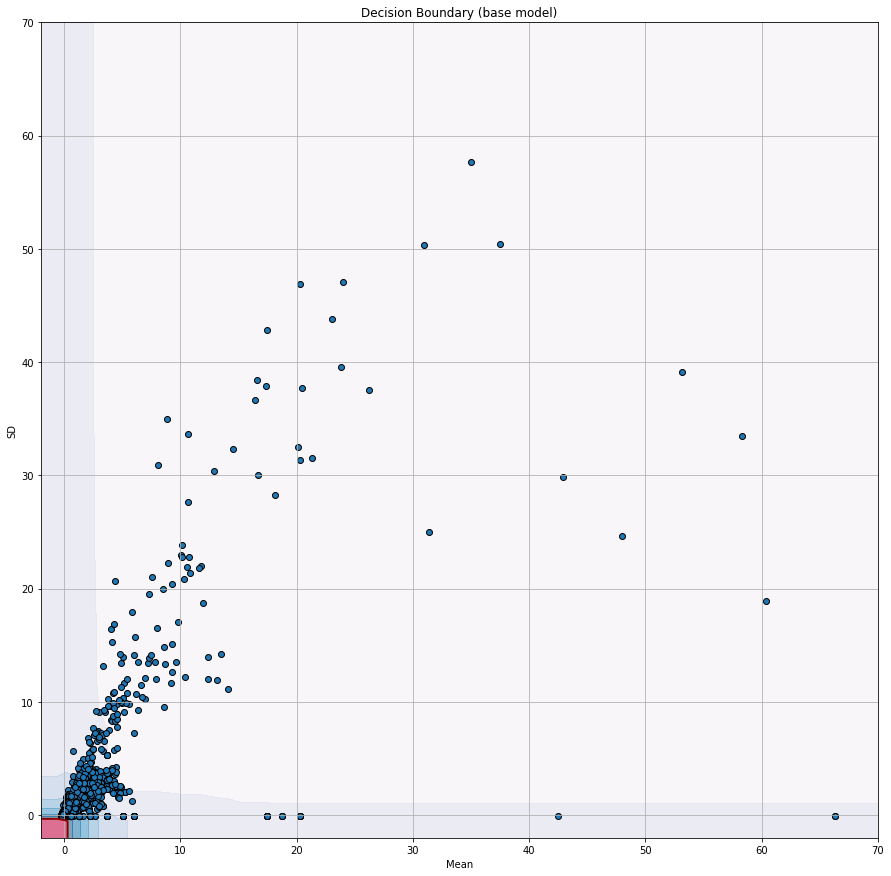

In [10]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_train.iloc[:, 0],
            df_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [11]:
clf = IsolationForest(random_state=16, contamination = 0.001)

In [13]:
clf.fit(df_train.values)

IsolationForest(contamination=0.001, random_state=16)

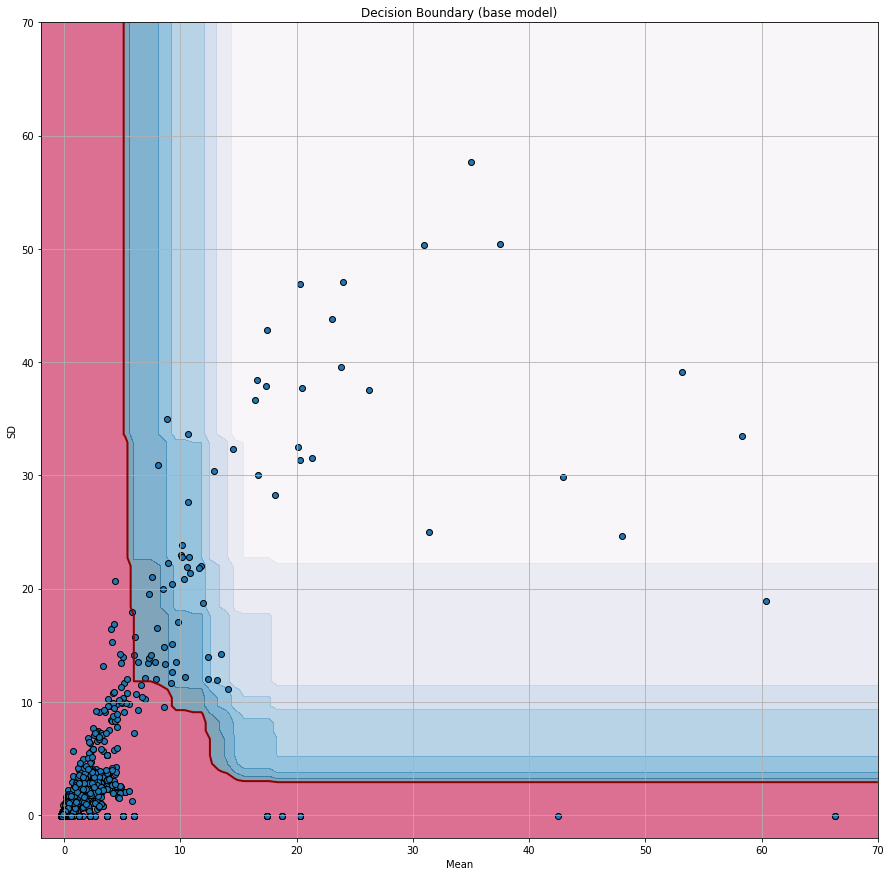

In [14]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_train.iloc[:, 0],
            df_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [17]:
test_predictions = clf.predict(df_test.values)

In [20]:
df_test = pd.concat([df_test, pd.Series(test_predictions)], axis = 1)

In [22]:
df_test_inlier = df_test[df_test[0]==1]

In [23]:
df_test_outlier = df_test[df_test[0]==-1]

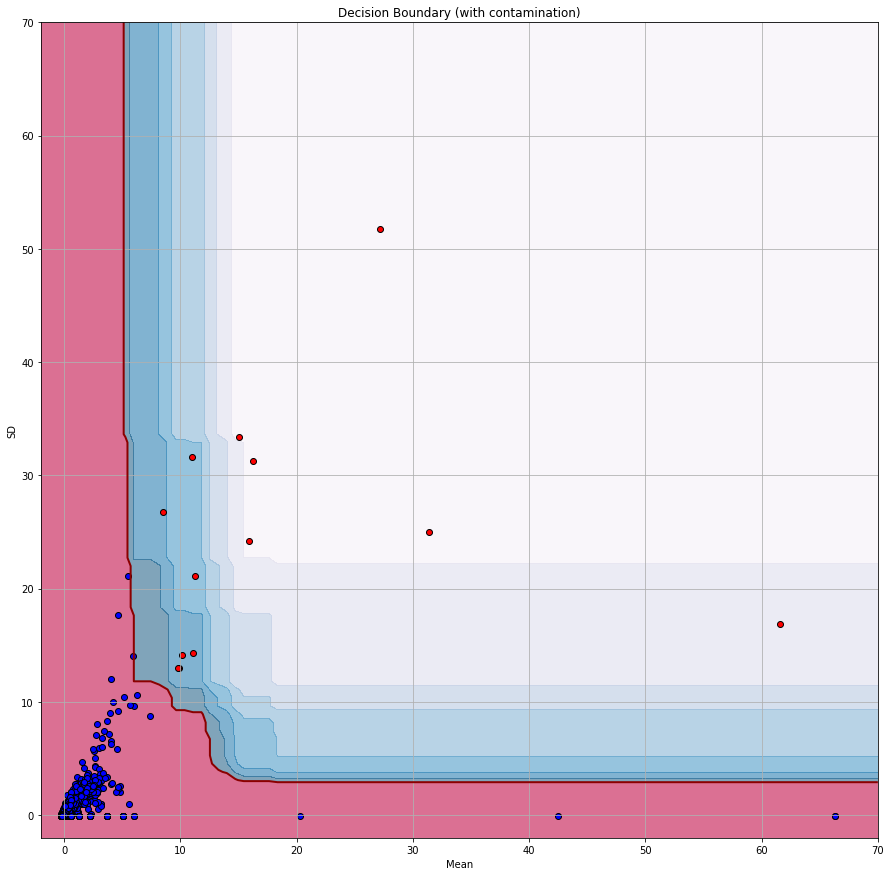

In [31]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_test_inlier.iloc[:, 0],
            df_test_inlier.iloc[:, 1],
            edgecolors='k', color='b')
plt.scatter(df_test_outlier.iloc[:, 0],
            df_test_outlier.iloc[:, 1],
            edgecolors='k', color='r')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [32]:
from joblib import dump

In [33]:
dump(clf, 'model.joblib')

['model.joblib']